In [1]:
# importing libraries and magic functions
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [3]:
df.shape


(4240, 16)

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [6]:
# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
#null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Visualization**

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

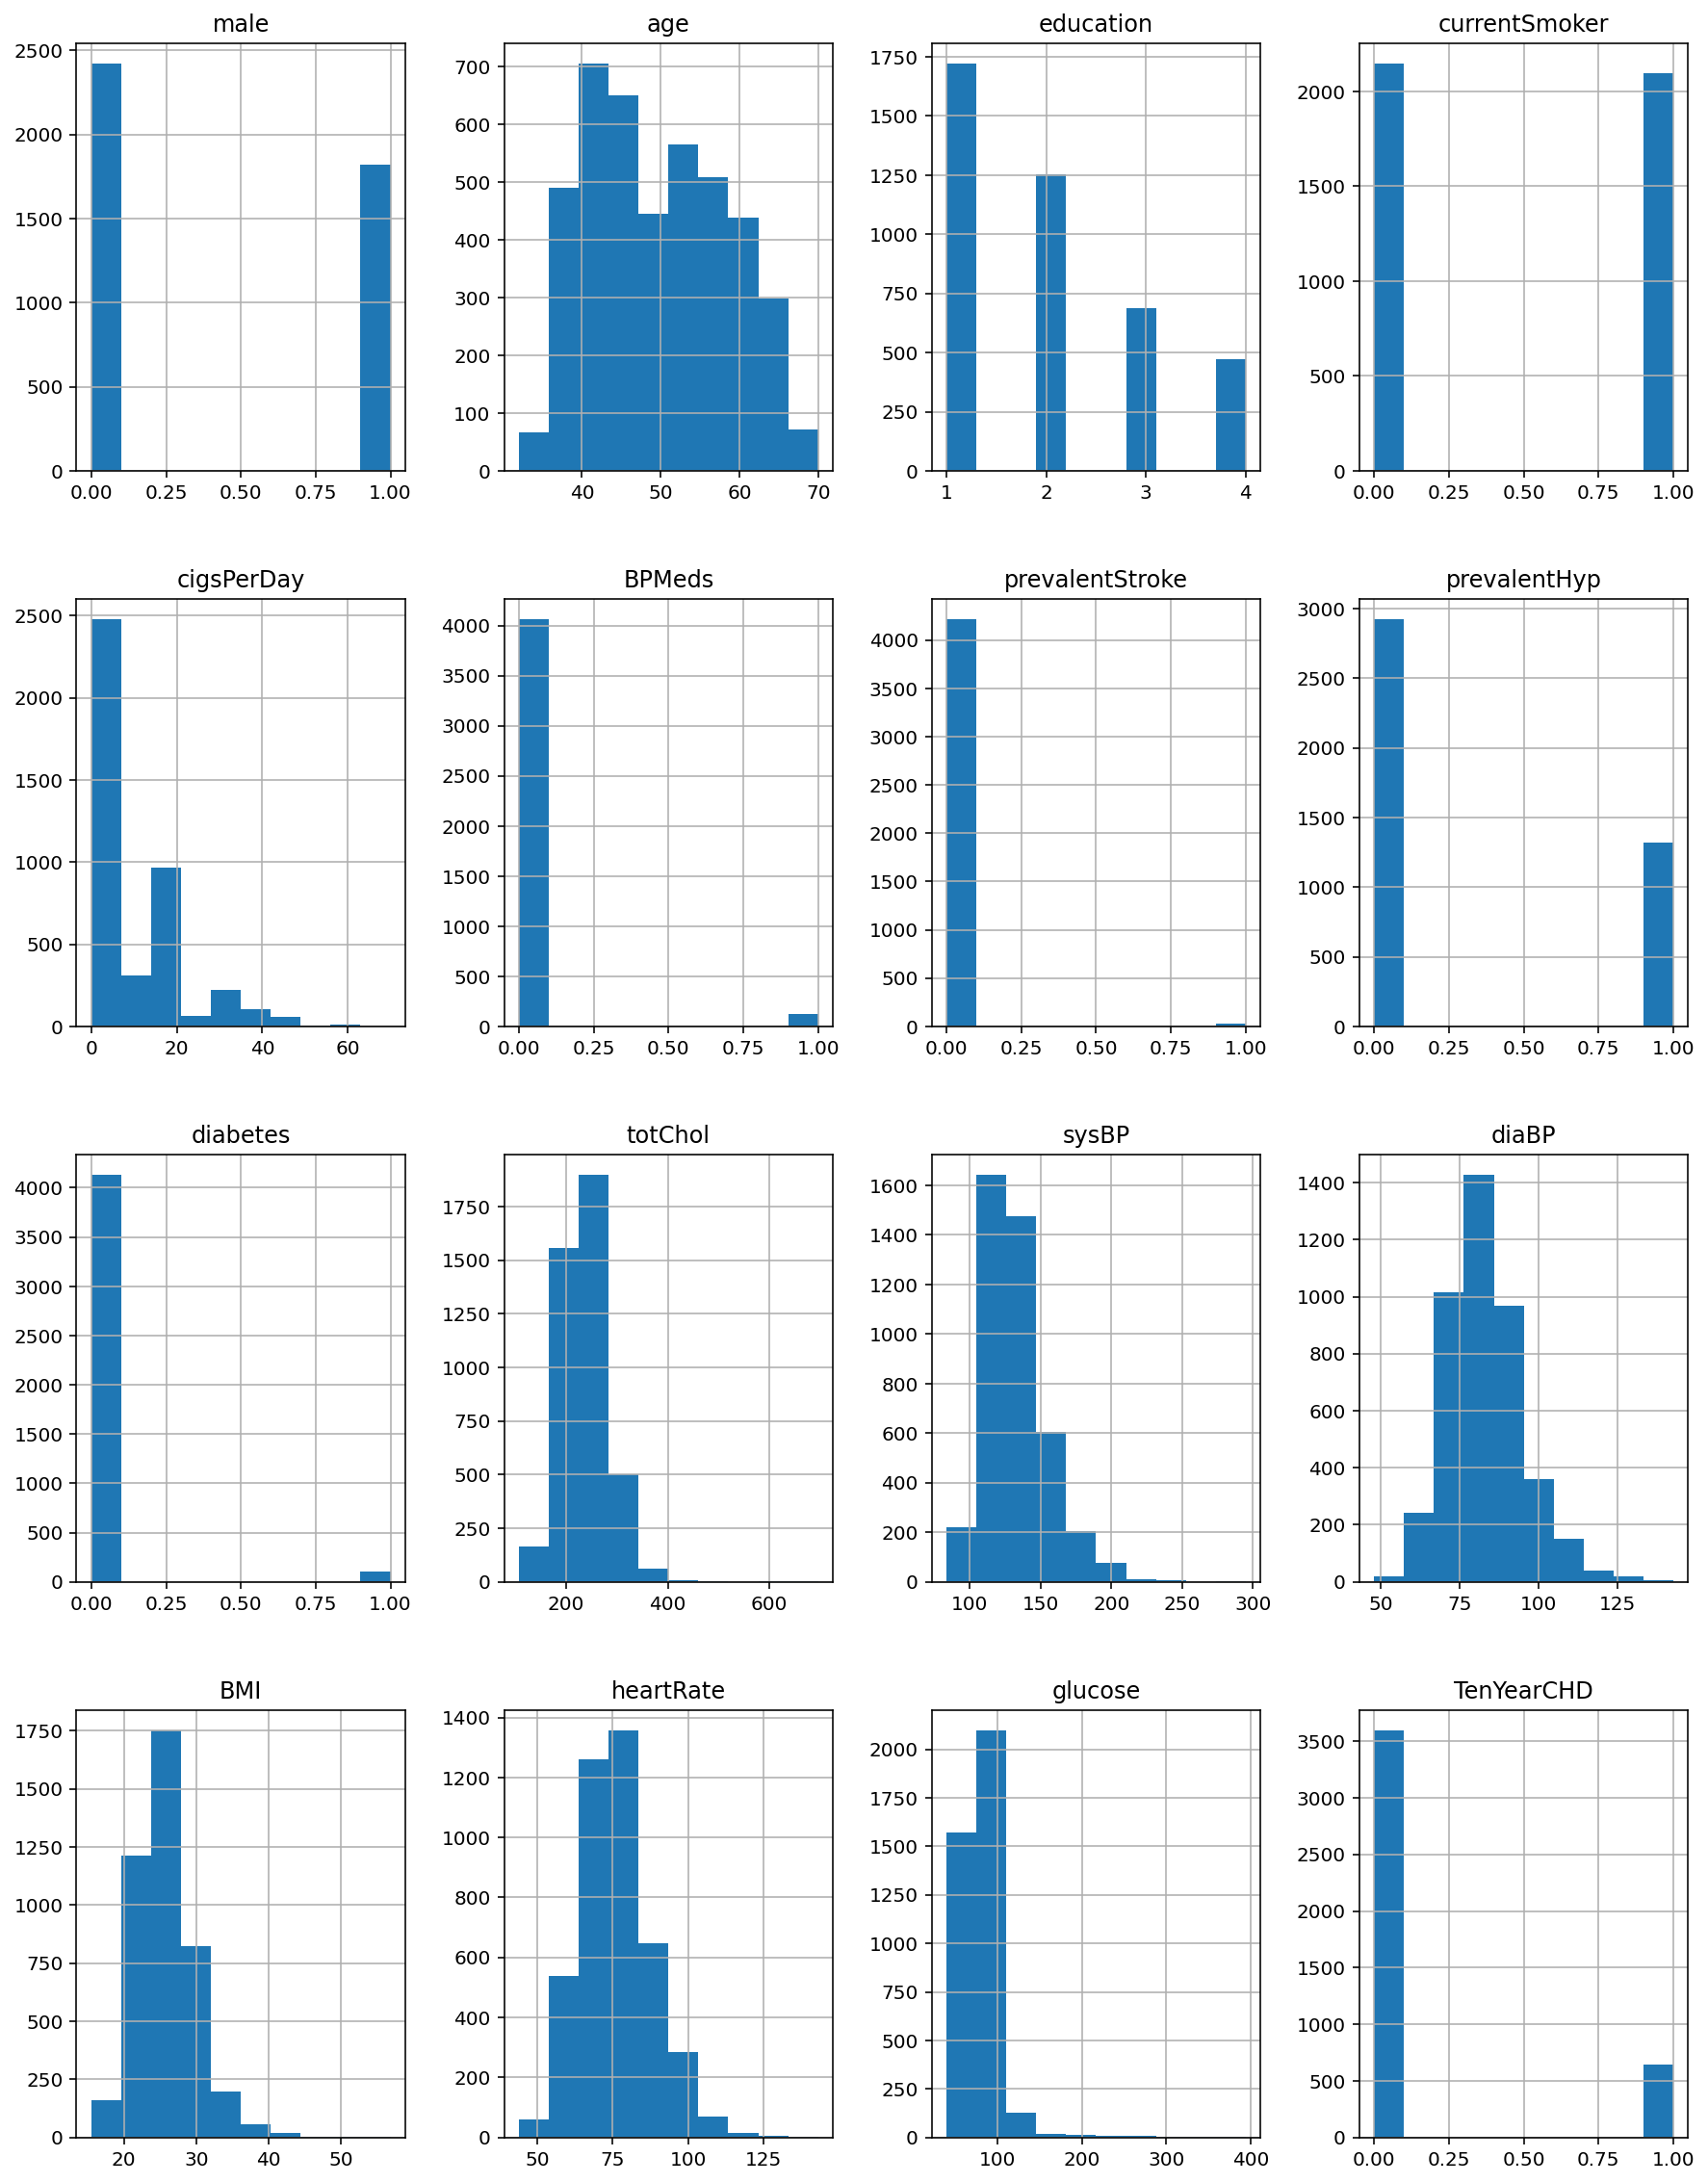

In [7]:

# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)


<AxesSubplot:>

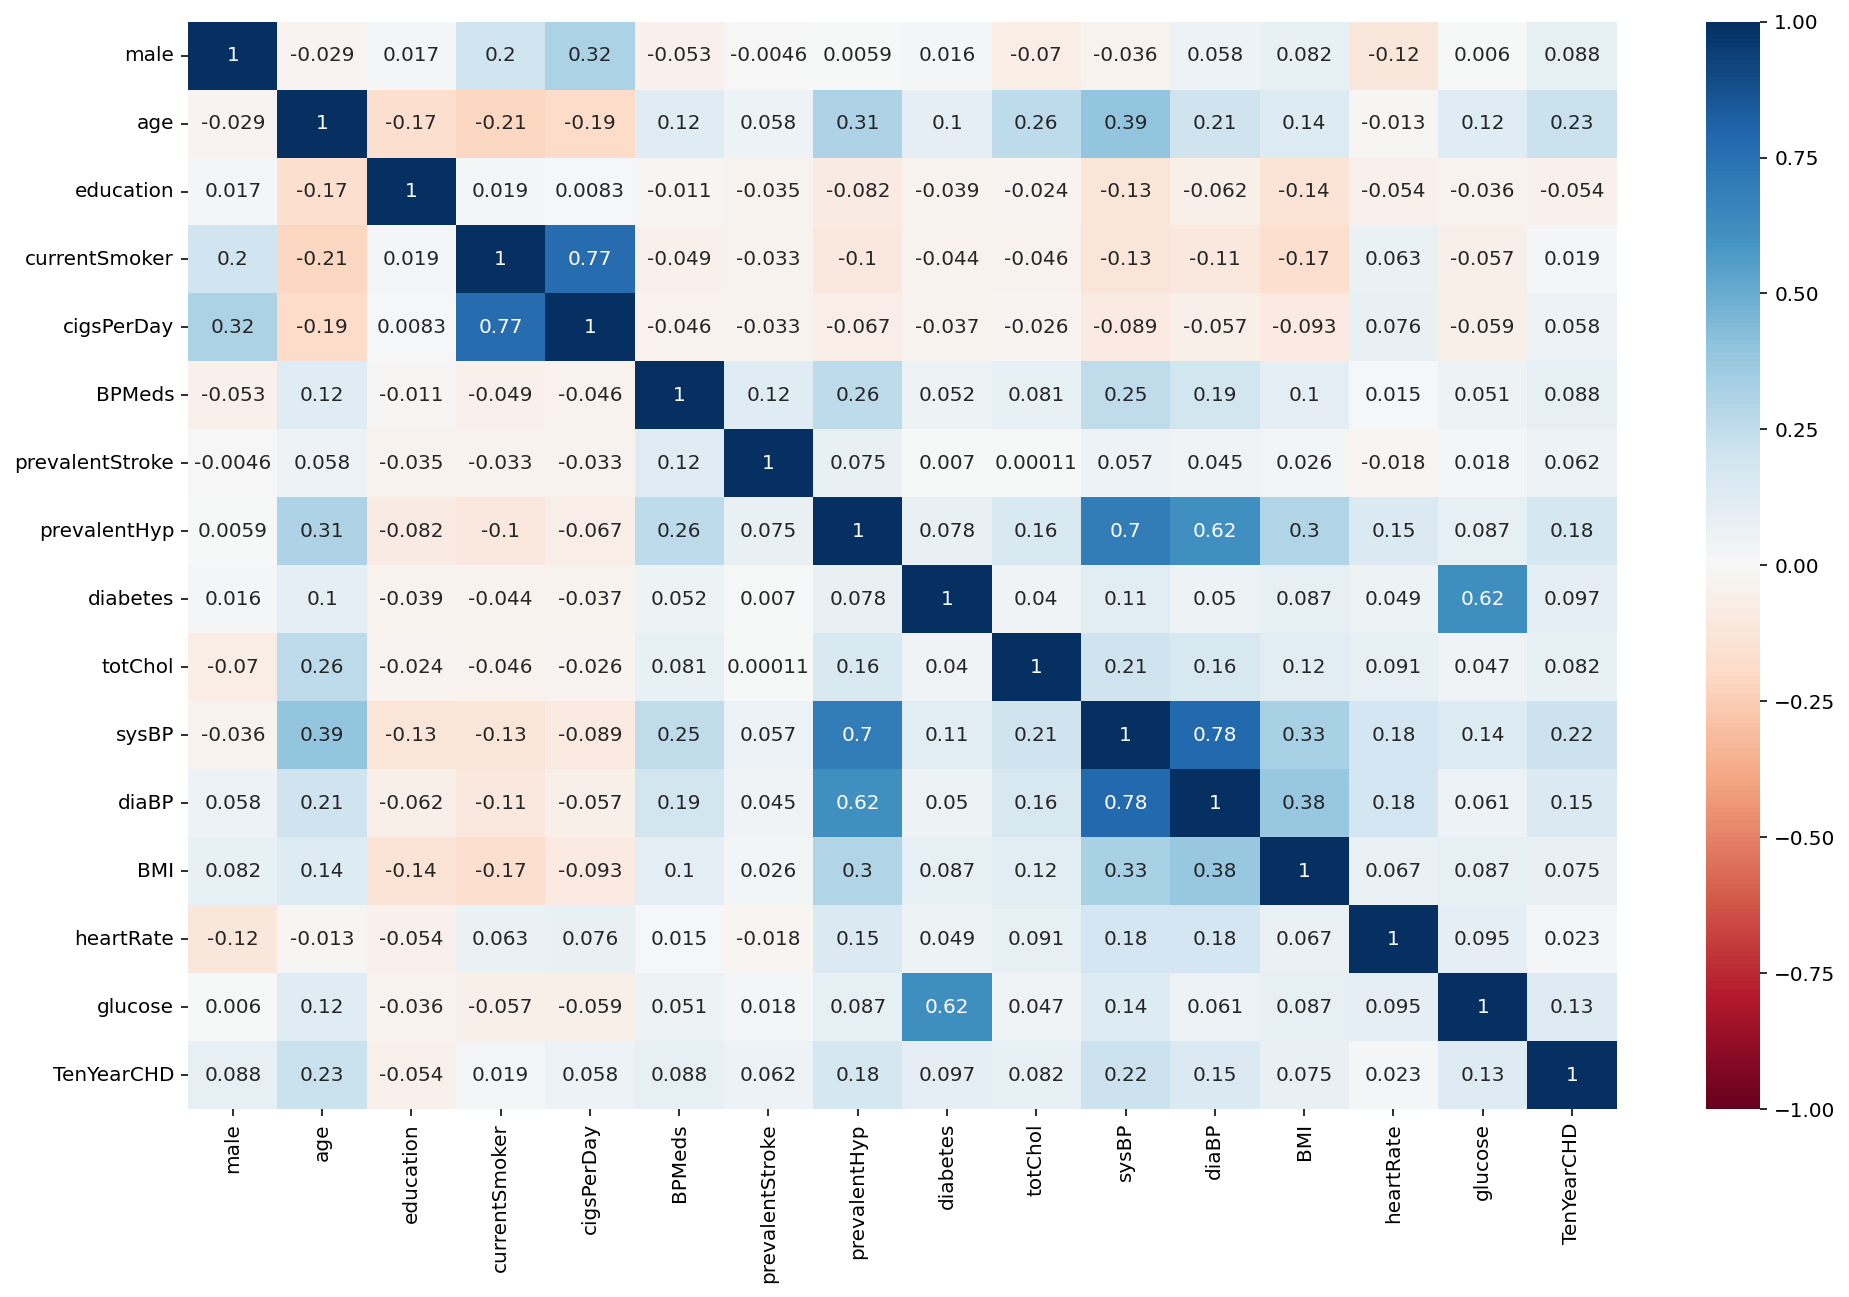

In [8]:
# checking which features are correlated with each other and are correlated with the outcome variable
fig=plt.figure(figsize=(16,10))
df_corr = df.corr()
sns.heatmap(df_corr,cmap='RdBu',vmax=1,vmin=-1,annot=True)

In [9]:
# Dropping columns education and glucose
df = df.drop(['education'], axis=1)
# Checking for more missing data 
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
# Imputation of the missing values
for column in df.columns:
    if df[column].isna().any():
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)


In [11]:

df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Feature Selection**

In [12]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

              Specs       Score
9             sysBP  727.935535
13          glucose  391.151105
1               age  319.266019
8           totChol  235.502392
3        cigsPerDay  220.812679
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.615014
0              male   18.899930
5   prevalentStroke   16.109887


Specs       Score
9             sysBP  727.935535
13          glucose  391.151105
1               age  319.266019
8           totChol  235.502392
3        cigsPerDay  220.812679
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.615014
0              male   18.899930
5   prevalentStroke   16.109887
11              BMI   15.227367
12        heartRate    4.232372
2     currentSmoker    0.811334

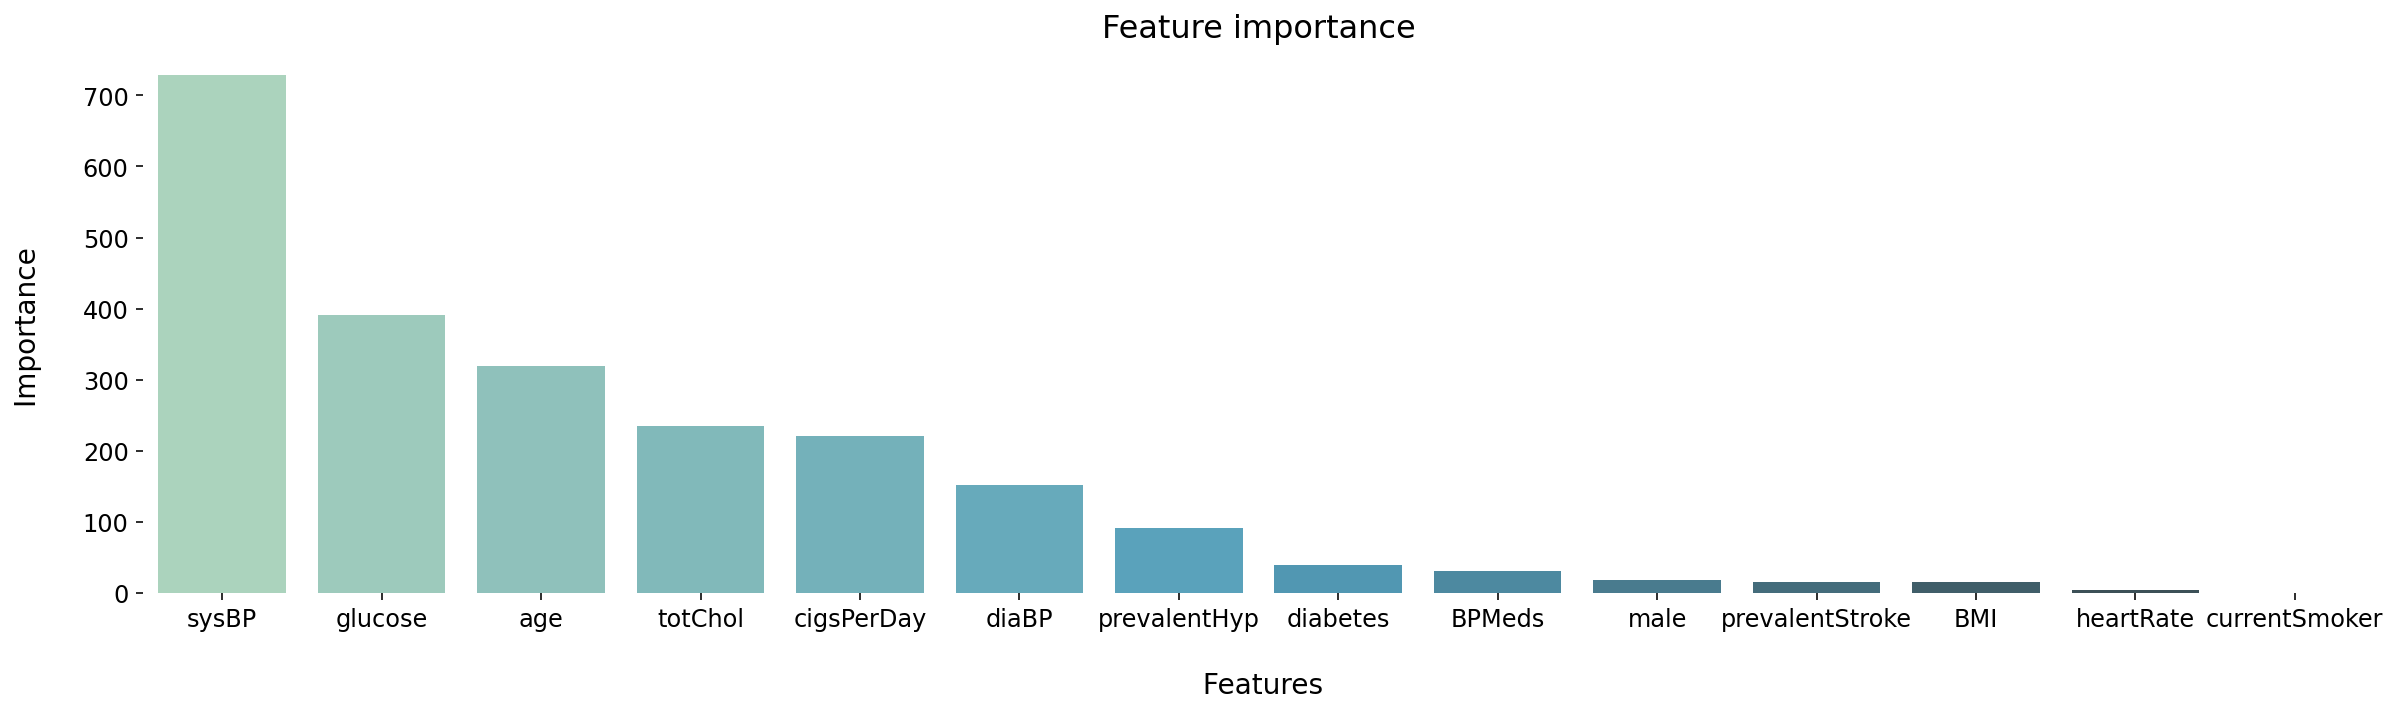

In [13]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [14]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

In [15]:
df.reset_index(drop=True,inplace=True)
df = df.assign(index_col=df.index)
df

male  age  currentSmoker  cigsPerDay    BPMeds  prevalentStroke  \
0        1   39              0         0.0  0.000000                0   
1        0   46              0         0.0  0.000000                0   
2        1   48              1        20.0  0.000000                0   
3        0   61              1        30.0  0.000000                0   
4        0   46              1        23.0  0.000000                0   
...    ...  ...            ...         ...       ...              ...   
4235     0   48              1        20.0  0.029615                0   
4236     0   44              1        15.0  0.000000                0   
4237     0   52              0         0.0  0.000000                0   
4238     1   40              0         0.0  0.000000                0   
4239     0   39              1        30.0  0.000000                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   
4238             1         0    185.0  141.0   98.0  25.60       67.0   
4239             0         0    196.0  133.0   86.0  20.91       85.0   

         glucose  TenYearCHD  index_col  
0      77.000000           0          0  
1      76.000000           0          1  
2      70.000000           0          2  
3     103.000000           1          3  
4      85.000000           0          4  
...          ...         ...        ...  
4235   86.000000           0       4235  
4236   81.963655           0       4236  
4237  107.000000           0       4237  
4238   72.000000           0       4238  
4239   80.000000           0       4239  

[4240 rows x 16 columns]

In [16]:
# Create new dataframe with selected features

sel_df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD','index_col']]
con_df=df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','index_col']]
df.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  index_col  
0           0          0  
1           0          1  
2           0          2  
3           1          3  
4           0          4

In [17]:
sel_df.isna().sum()

sysBP           0
glucose         0
age             0
totChol         0
cigsPerDay      0
diaBP           0
prevalentHyp    0
diabetes        0
BPMeds          0
male            0
TenYearCHD      0
index_col       0
dtype: int64

<AxesSubplot:>

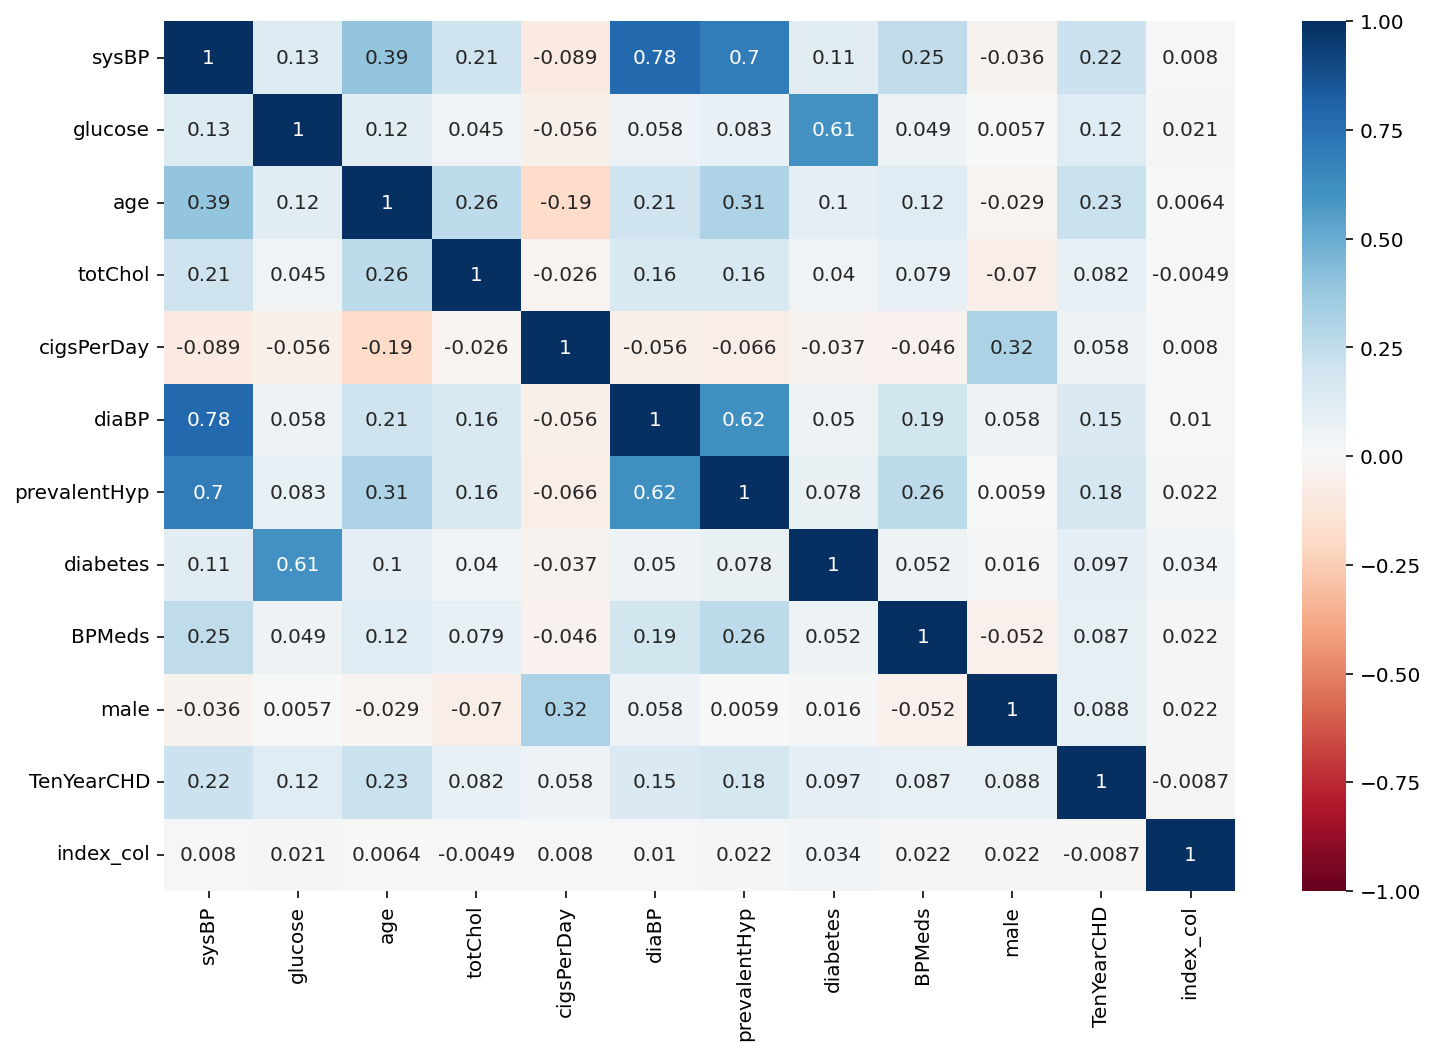

In [18]:
# Checking correlation again
fig=plt.figure(figsize=(12,8))
df_corr = sel_df.corr()
sns.heatmap(df_corr,cmap='RdBu', vmax=1, vmin=-1, annot=True)


In [19]:
# Checking for outliers
sel_df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000  4240.000000  4240.000000   
mean    132.354599    81.963655    49.580189   236.699523     9.005937   
std      22.033300    22.831748     8.572942    44.327521    11.881610   
min      83.500000    40.000000    32.000000   107.000000     0.000000   
25%     117.000000    72.000000    42.000000   206.000000     0.000000   
50%     128.000000    80.000000    49.000000   234.000000     0.000000   
75%     144.000000    85.000000    56.000000   262.000000    20.000000   
max     295.000000   394.000000    70.000000   696.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  4240.000000   4240.000000  4240.000000  4240.000000  4240.000000   
mean     82.897759      0.310613     0.025708     0.029615     0.429245   
std      11.910394      0.462799     0.158280     0.168481     0.495027   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  index_col  
count  4240.000000  4240.0000  
mean      0.151887  2119.5000  
std       0.358953  1224.1269  
min       0.000000     0.0000  
25%       0.000000  1059.7500  
50%       0.000000  2119.5000  
75%       0.000000  3179.2500  
max       1.000000  4239.0000

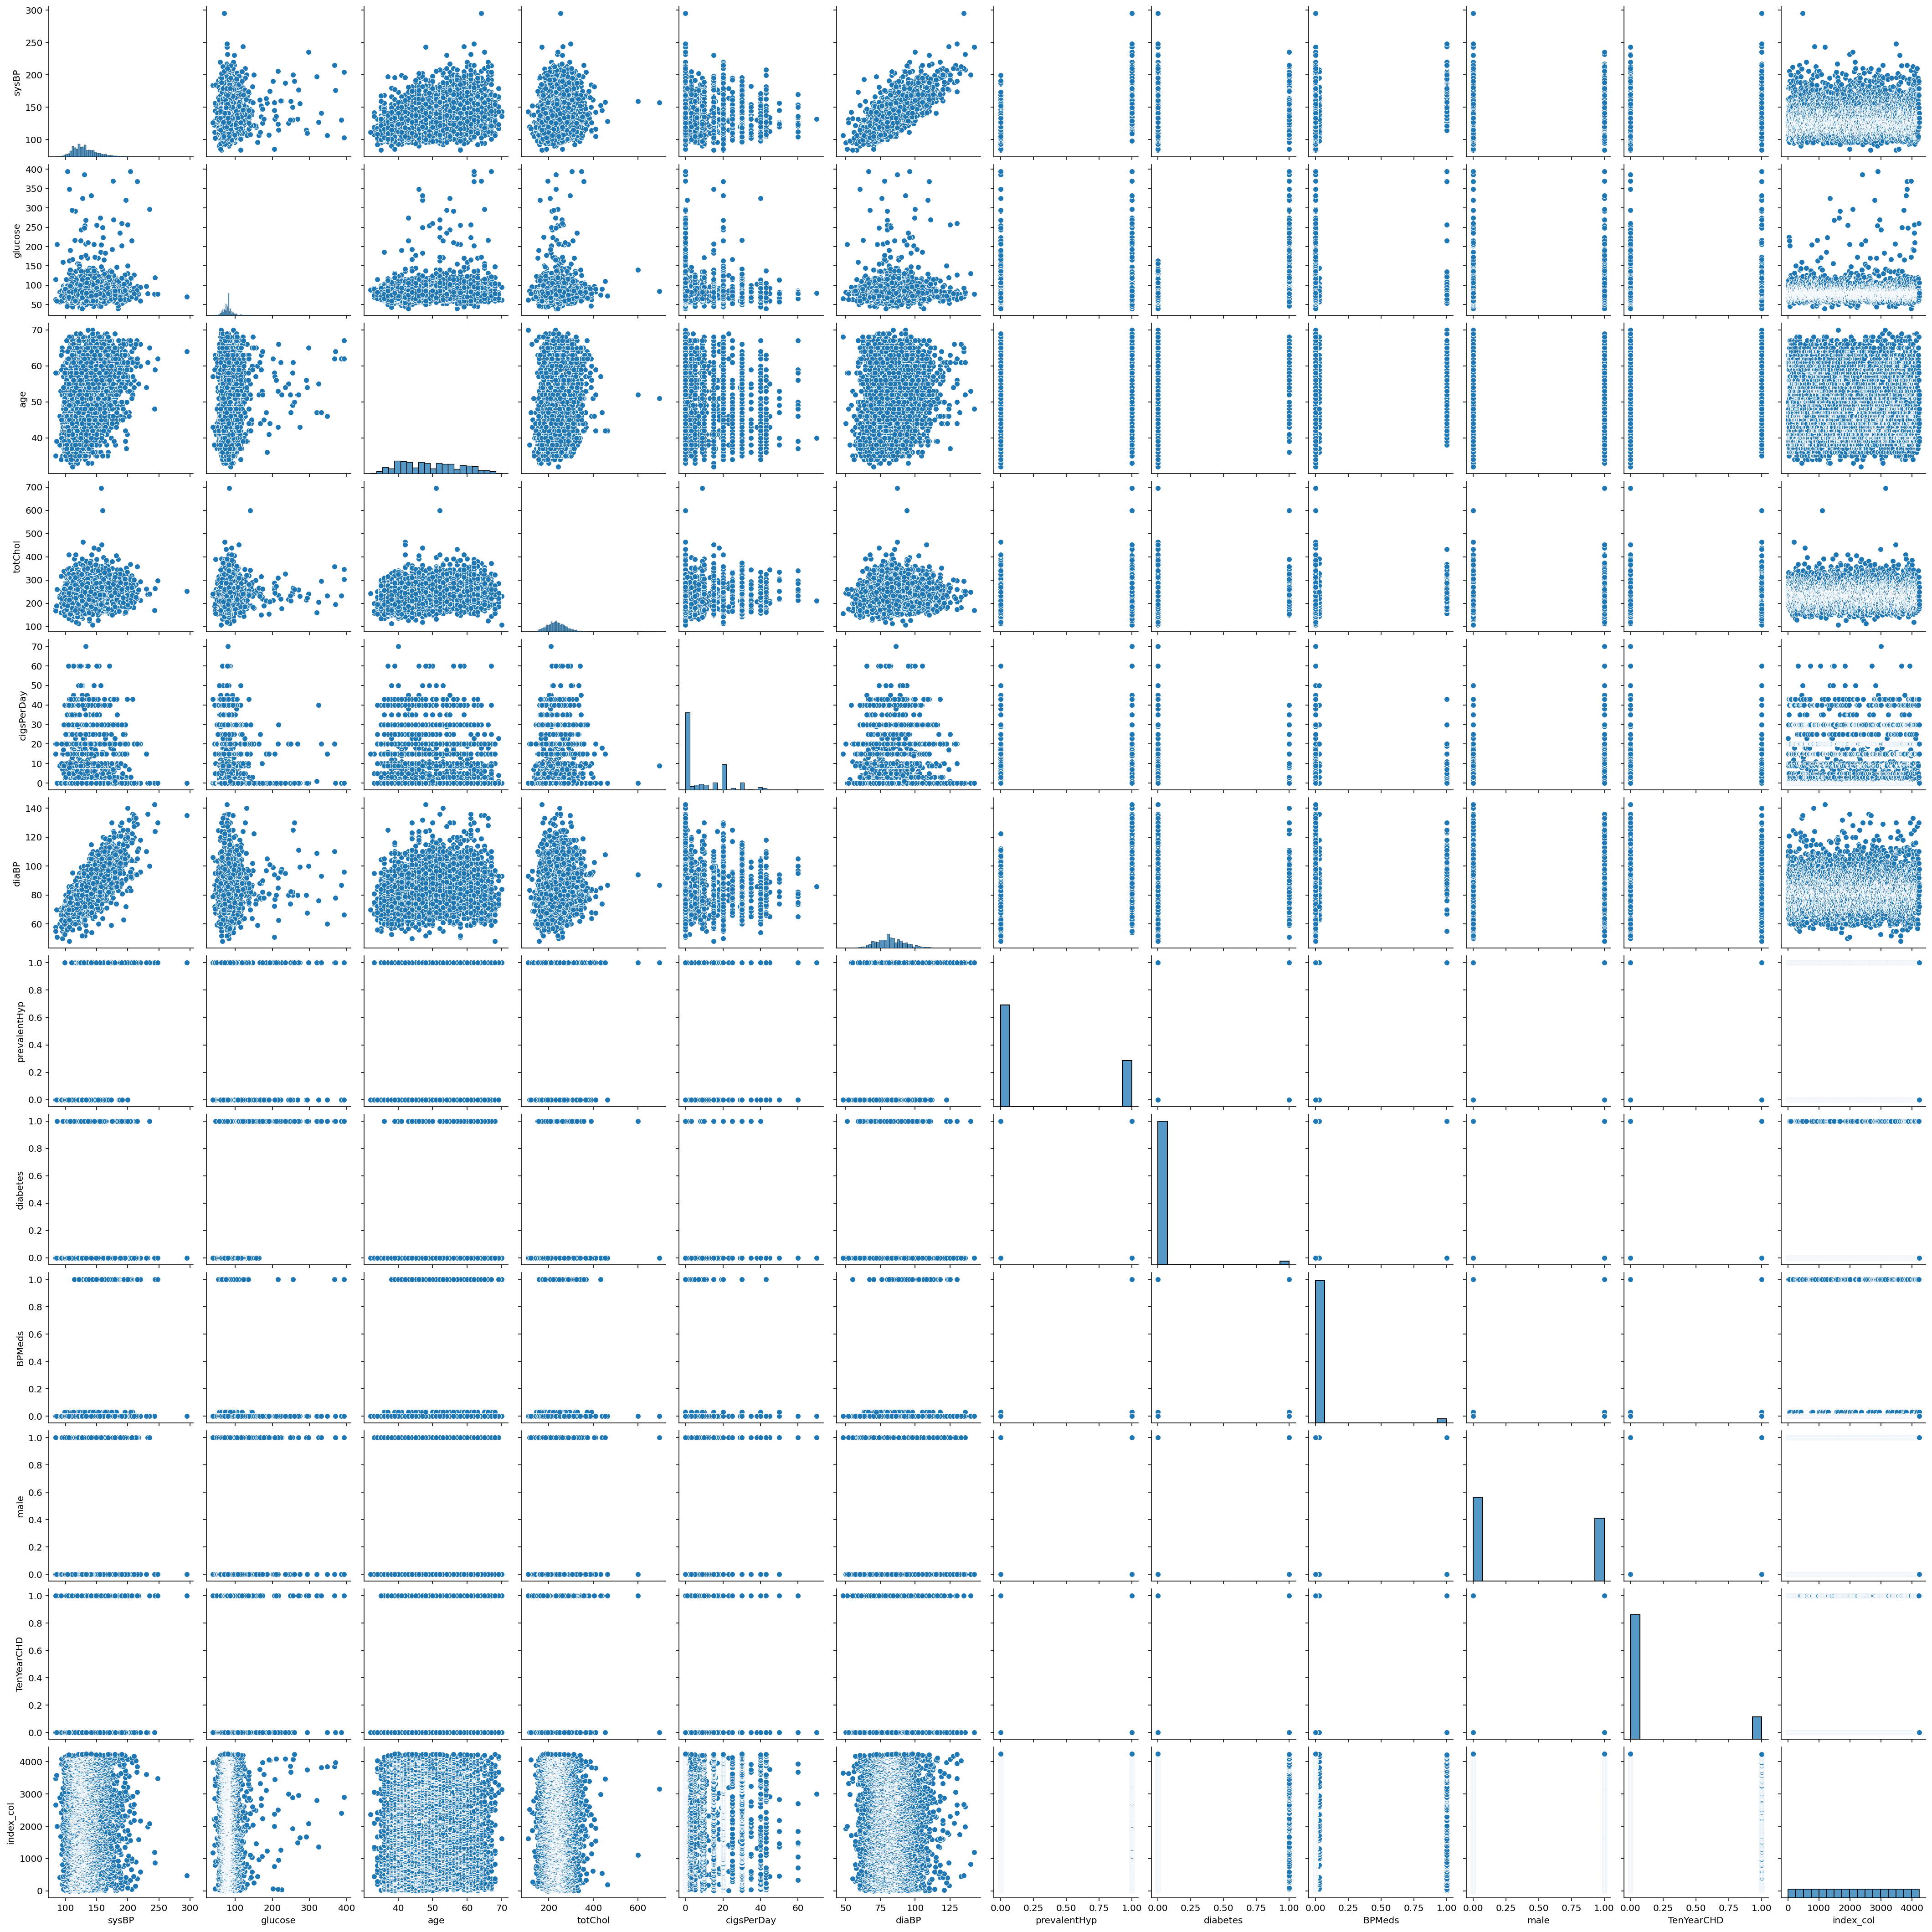

In [20]:
sns.pairplot(sel_df)

**Outlier Analysis**

In [21]:
# Creating outlier function to detect and print lower and upper bounds, iqr, and a list of outiers.

def outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=np.round(q3-q1,2)
    lower_bound=np.round(q1-(1.5*iqr),2)
    upper_bound=np.round(q3+(1.5*iqr),2)
    outliers=df[(df<lower_bound)|(df>upper_bound)]
    outliers_list=outliers.tolist()
    print(f"lower bound: {lower_bound}, upper bound: {upper_bound}")
    print(f"iqr: {iqr}")
    print(f"outliers: {outliers_list}")

#find the outliers in the numerical features.
outliers={}
for i in con_df.columns:
    print("Feature_name:",i)
    outliers[i]=outlier(con_df[i])
    print("")

Feature_name: sysBP
lower bound: 76.5, upper bound: 184.5
iqr: 27.0
outliers: [206.0, 190.0, 200.0, 187.0, 212.0, 191.0, 200.0, 189.0, 197.5, 195.0, 189.0, 204.0, 215.0, 188.0, 197.0, 209.0, 295.0, 189.0, 188.0, 185.0, 220.0, 205.5, 186.0, 192.0, 185.0, 195.0, 200.0, 244.0, 213.0, 206.0, 199.0, 198.0, 206.0, 201.0, 189.0, 243.0, 187.5, 185.5, 195.0, 199.0, 186.5, 186.0, 204.0, 217.0, 196.0, 193.0, 187.0, 196.0, 189.0, 196.0, 190.0, 185.0, 202.0, 195.0, 200.0, 232.0, 191.0, 235.0, 188.0, 205.0, 185.0, 220.0, 210.0, 193.0, 188.5, 190.0, 185.0, 192.0, 199.0, 197.5, 190.0, 195.0, 210.0, 202.5, 191.5, 208.0, 191.0, 205.0, 190.0, 210.0, 190.0, 197.0, 198.0, 190.0, 185.0, 204.0, 207.5, 191.0, 195.0, 198.0, 197.0, 186.5, 193.0, 215.0, 196.0, 199.5, 193.0, 195.0, 248.0, 196.0, 202.0, 185.0, 185.0, 230.0, 197.0, 189.0, 214.0, 196.0, 215.0, 192.5, 188.0, 187.0, 194.0, 207.0, 185.5, 213.0, 192.5, 192.5, 200.0, 187.0, 190.0, 206.0, 210.0, 195.0, 188.0, 190.0]

Feature_name: glucose
lower bound: 52.

In [22]:
con_df.reset_index(drop=True, inplace=True)
con_col=con_df.columns[:-1].tolist()
con_col

['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP']

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of sysBP')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of glucose')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of age')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of totChol')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of cigsPerDay')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of diaBP')

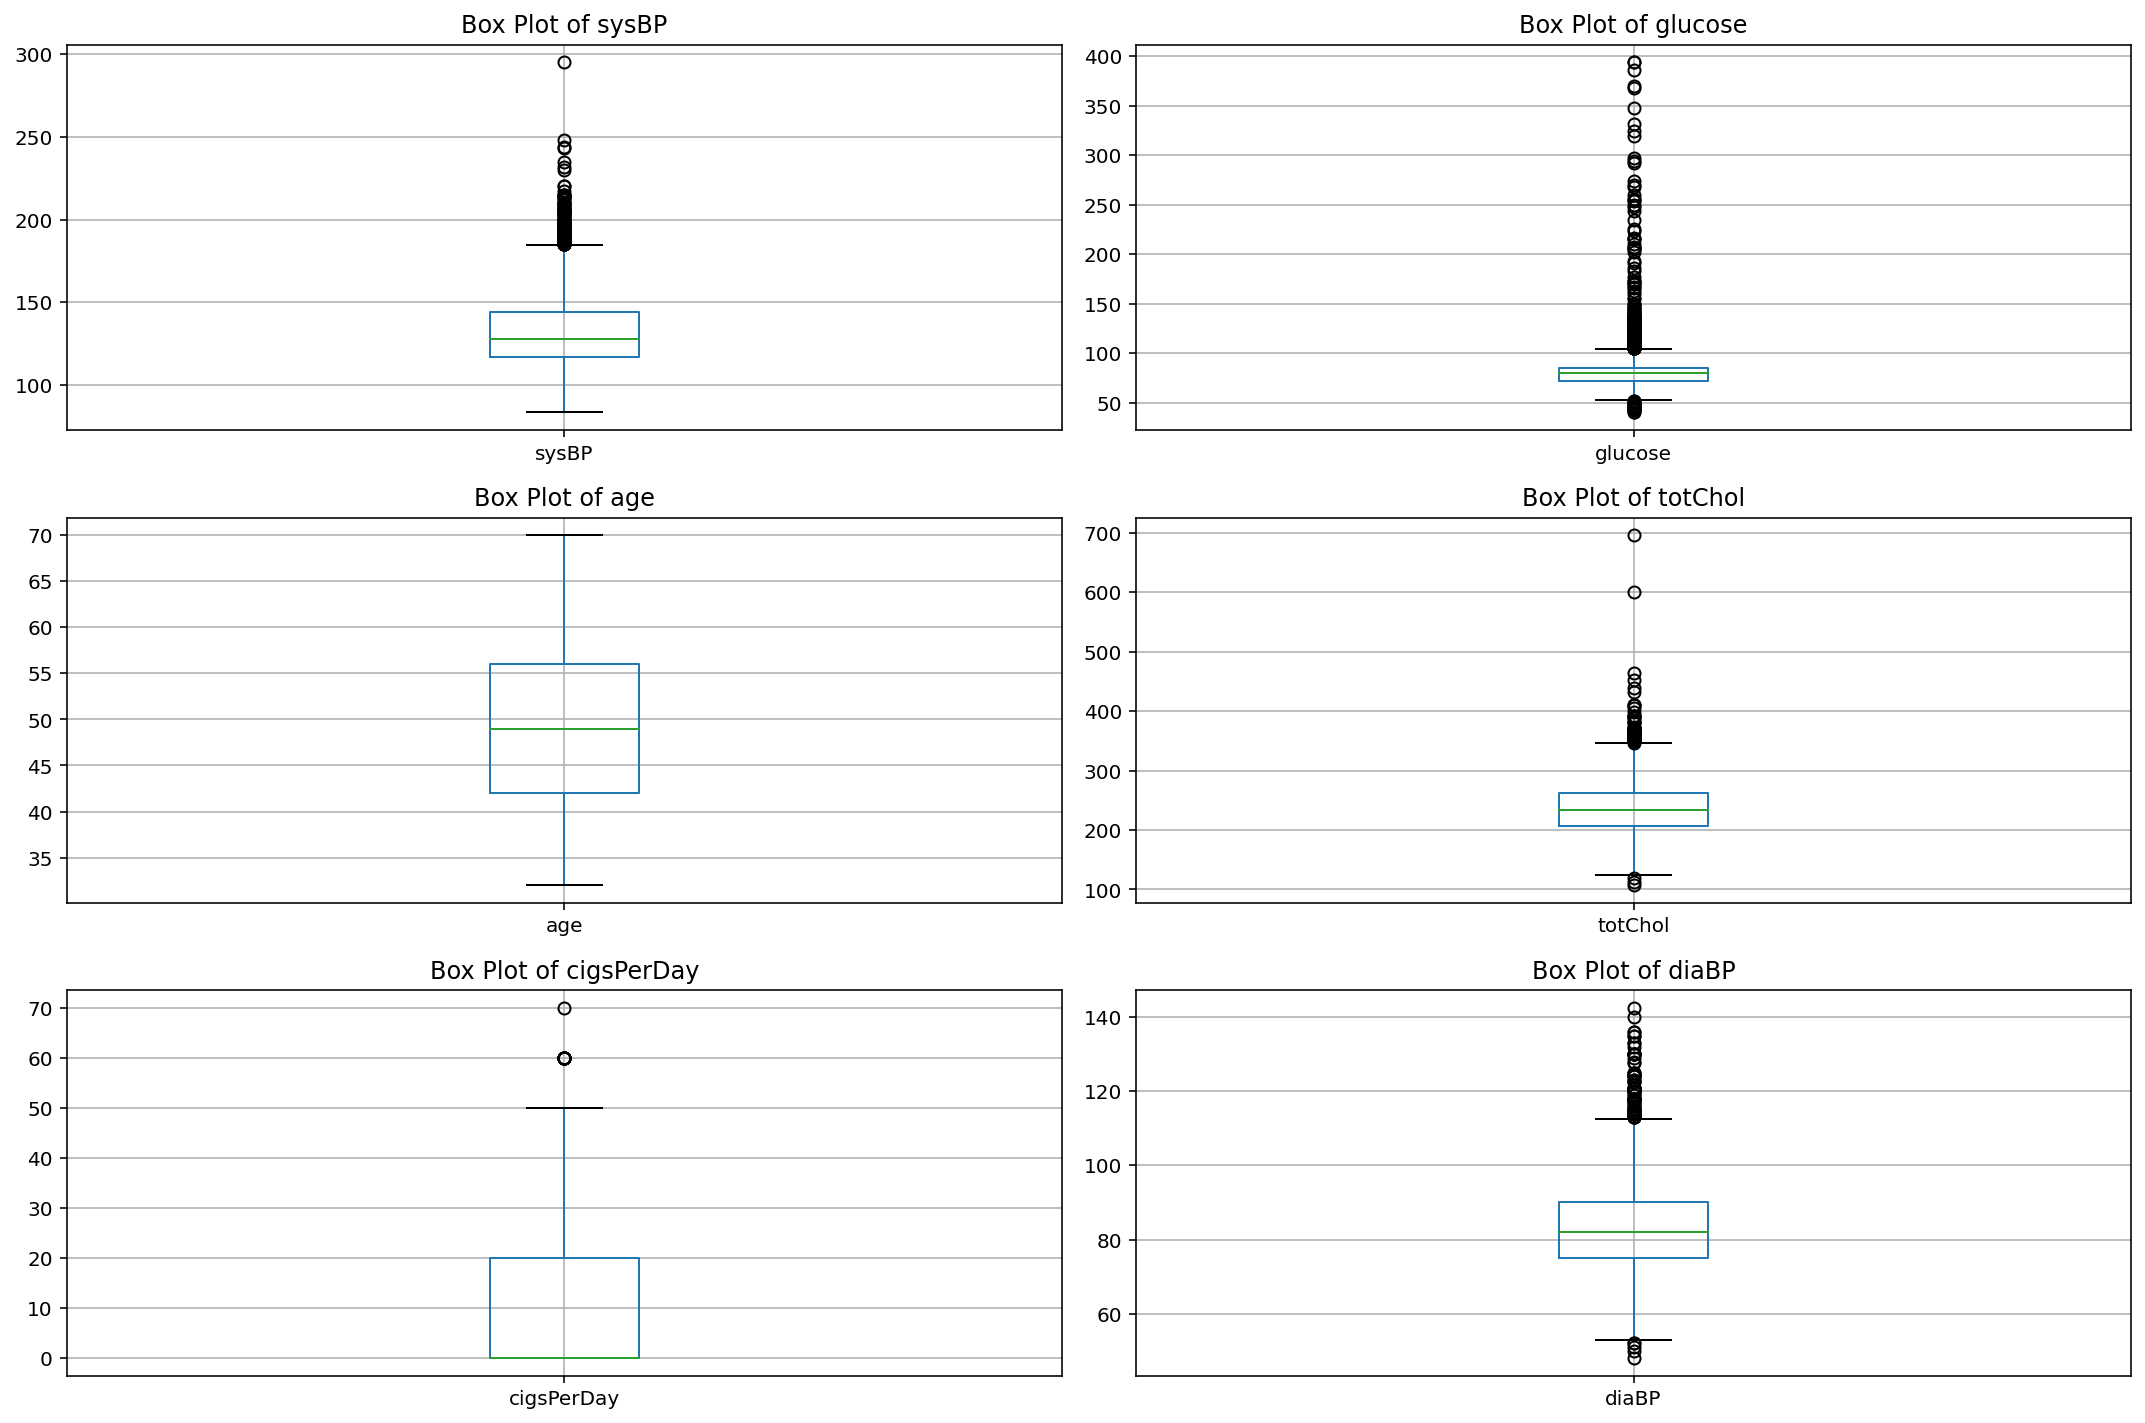

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axes = axes.ravel()

for i in range(len(con_col)):
    #print("Box Plot of",con_col[i],"\n")
    sel_df.boxplot(column=con_col[i], ax=axes[i])
    axes[i].set_title(f"Box Plot of {con_col[i]}")
    
plt.tight_layout()
plt.show()

In [24]:
#clamp the outliers to the upper and lower bounds
for i in con_df.columns:
    q1 = con_df[i].quantile(0.25)
    q3 = con_df[i].quantile(0.75)
    iqr = np.round(q3 - q1, 2)
    lower_bound = np.round(q1 - (1.5 * iqr), 2)
    upper_bound = np.round(q3 + (1.5 * iqr), 2)
    con_df[i] = np.where(con_df[i] < lower_bound, lower_bound, con_df[i])
    con_df[i] = np.where(con_df[i] > upper_bound, upper_bound, con_df[i])

In [25]:
#find the outliers in the numerical features.
outliers1={}
for i in con_df.columns:
    print("Feature_name:",i)
    outliers1[i]=outlier(con_df[i])
    print("")

Feature_name: sysBP
lower bound: 76.5, upper bound: 184.5
iqr: 27.0
outliers: []

Feature_name: glucose
lower bound: 52.5, upper bound: 104.5
iqr: 13.0
outliers: []

Feature_name: age
lower bound: 21.0, upper bound: 77.0
iqr: 14.0
outliers: []

Feature_name: totChol
lower bound: 122.0, upper bound: 346.0
iqr: 56.0
outliers: []

Feature_name: cigsPerDay
lower bound: -30.0, upper bound: 50.0
iqr: 20.0
outliers: []

Feature_name: diaBP
lower bound: 52.5, upper bound: 112.5
iqr: 15.0
outliers: []

Feature_name: index_col
lower bound: -2119.5, upper bound: 6358.5
iqr: 2119.5
outliers: []



<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of sysBP')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of glucose')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of age')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of totChol')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of cigsPerDay')

<AxesSubplot:>

Text(0.5, 1.0, 'Box Plot of diaBP')

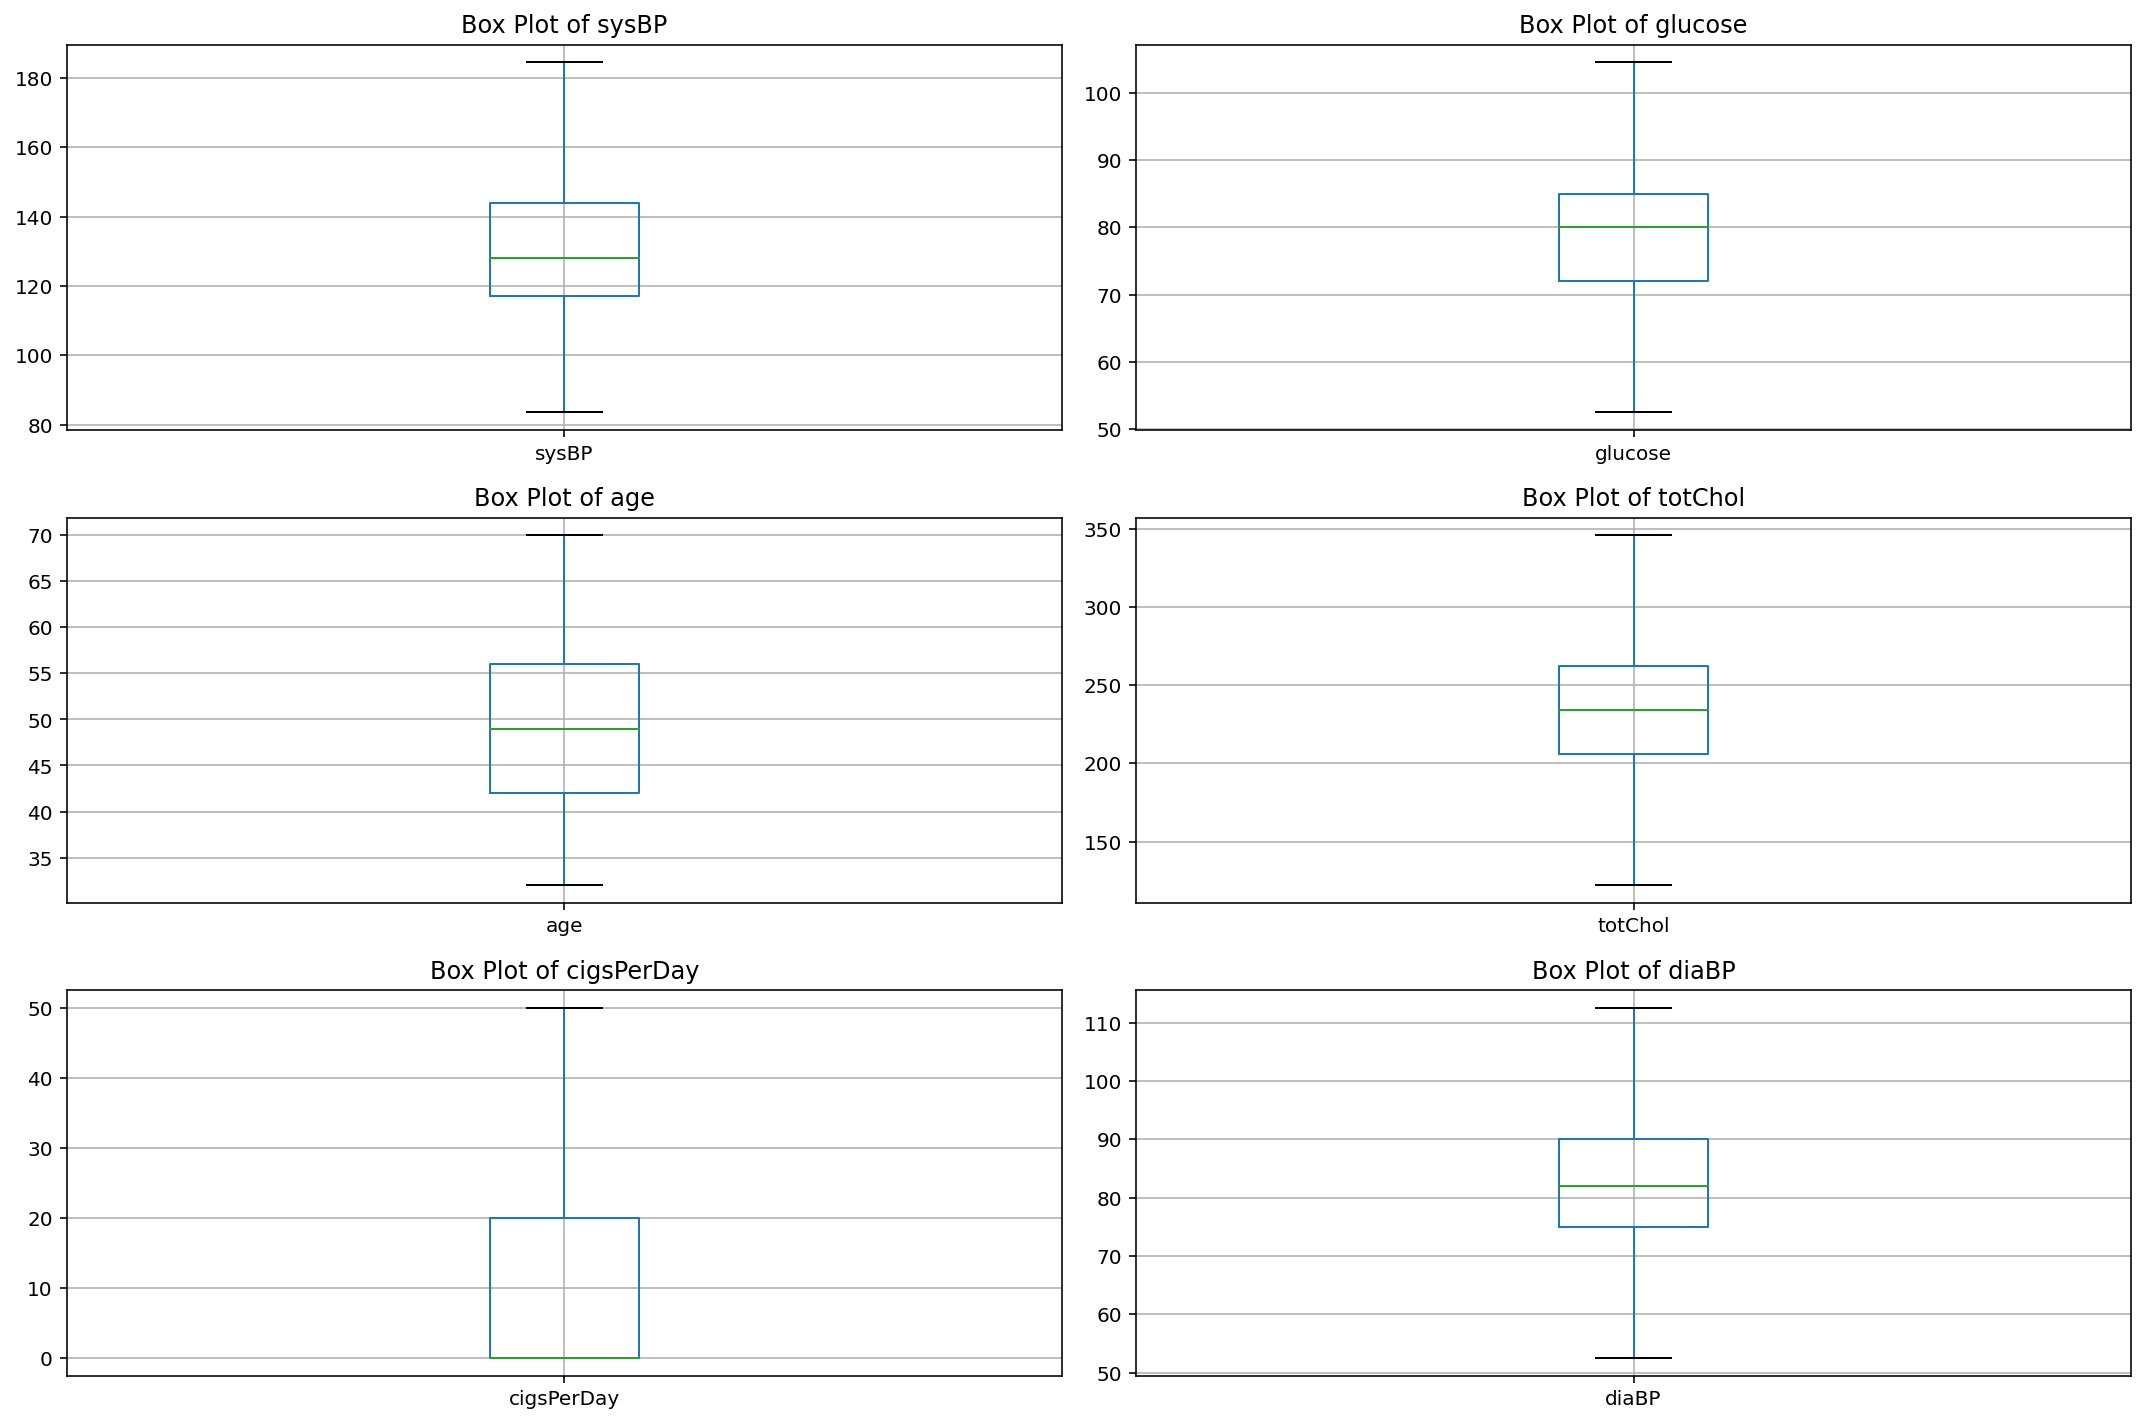

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axes = axes.ravel()

for i in range(len(con_col)):
    #print("Box Plot of",con_col[i],"\n")
    con_df.boxplot(column=con_col[i], ax=axes[i])
    axes[i].set_title(f"Box Plot of {con_col[i]}")
    
plt.tight_layout()
plt.show()

In [27]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sysBP       4240 non-null   float64
 1   glucose     4240 non-null   float64
 2   age         4240 non-null   float64
 3   totChol     4240 non-null   float64
 4   cigsPerDay  4240 non-null   float64
 5   diaBP       4240 non-null   float64
 6   index_col   4240 non-null   float64
dtypes: float64(7)
memory usage: 232.0 KB


In [28]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sysBP         4240 non-null   float64
 1   glucose       4240 non-null   float64
 2   age           4240 non-null   int64  
 3   totChol       4240 non-null   float64
 4   cigsPerDay    4240 non-null   float64
 5   diaBP         4240 non-null   float64
 6   prevalentHyp  4240 non-null   int64  
 7   diabetes      4240 non-null   int64  
 8   BPMeds        4240 non-null   float64
 9   male          4240 non-null   int64  
 10  TenYearCHD    4240 non-null   int64  
 11  index_col     4240 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 397.6 KB


In [29]:
ori_df = df[['prevalentHyp','diabetes','BPMeds','male','TenYearCHD','index_col']]
ori_df.reset_index(drop=True, inplace=True)
ori_df

prevalentHyp  diabetes    BPMeds  male  TenYearCHD  index_col
0                0         0  0.000000     1           0          0
1                0         0  0.000000     0           0          1
2                0         0  0.000000     1           0          2
3                1         0  0.000000     0           1          3
4                0         0  0.000000     0           0          4
...            ...       ...       ...   ...         ...        ...
4235             0         0  0.029615     0           0       4235
4236             0         0  0.000000     0           0       4236
4237             0         0  0.000000     0           0       4237
4238             1         0  0.000000     1           0       4238
4239             0         0  0.000000     0           0       4239

[4240 rows x 6 columns]

In [30]:
con_df

sysBP     glucose   age  totChol  cigsPerDay  diaBP  index_col
0     106.0   77.000000  39.0    195.0         0.0   70.0        0.0
1     121.0   76.000000  46.0    250.0         0.0   81.0        1.0
2     127.5   70.000000  48.0    245.0        20.0   80.0        2.0
3     150.0  103.000000  61.0    225.0        30.0   95.0        3.0
4     130.0   85.000000  46.0    285.0        23.0   84.0        4.0
...     ...         ...   ...      ...         ...    ...        ...
4235  131.0   86.000000  48.0    248.0        20.0   72.0     4235.0
4236  126.5   81.963655  44.0    210.0        15.0   87.0     4236.0
4237  133.5  104.500000  52.0    269.0         0.0   83.0     4237.0
4238  141.0   72.000000  40.0    185.0         0.0   98.0     4238.0
4239  133.0   80.000000  39.0    196.0        30.0   86.0     4239.0

[4240 rows x 7 columns]

In [31]:
df_clean = pd.merge(con_df, ori_df, on='index_col')
df_clean

sysBP     glucose   age  totChol  cigsPerDay  diaBP  index_col  \
0     106.0   77.000000  39.0    195.0         0.0   70.0        0.0   
1     121.0   76.000000  46.0    250.0         0.0   81.0        1.0   
2     127.5   70.000000  48.0    245.0        20.0   80.0        2.0   
3     150.0  103.000000  61.0    225.0        30.0   95.0        3.0   
4     130.0   85.000000  46.0    285.0        23.0   84.0        4.0   
...     ...         ...   ...      ...         ...    ...        ...   
4235  131.0   86.000000  48.0    248.0        20.0   72.0     4235.0   
4236  126.5   81.963655  44.0    210.0        15.0   87.0     4236.0   
4237  133.5  104.500000  52.0    269.0         0.0   83.0     4237.0   
4238  141.0   72.000000  40.0    185.0         0.0   98.0     4238.0   
4239  133.0   80.000000  39.0    196.0        30.0   86.0     4239.0   

      prevalentHyp  diabetes    BPMeds  male  TenYearCHD  
0                0         0  0.000000     1           0  
1                0         0  0.000000     0           0  
2                0         0  0.000000     1           0  
3                1         0  0.000000     0           1  
4                0         0  0.000000     0           0  
...            ...       ...       ...   ...         ...  
4235             0         0  0.029615     0           0  
4236             0         0  0.000000     0           0  
4237             0         0  0.000000     0           0  
4238             1         0  0.000000     1           0  
4239             0         0  0.000000     0           0  

[4240 rows x 12 columns]

In [32]:
df_clean = df_clean.drop('index_col', axis=1)

In [33]:
df_clean

sysBP     glucose   age  totChol  cigsPerDay  diaBP  prevalentHyp  \
0     106.0   77.000000  39.0    195.0         0.0   70.0             0   
1     121.0   76.000000  46.0    250.0         0.0   81.0             0   
2     127.5   70.000000  48.0    245.0        20.0   80.0             0   
3     150.0  103.000000  61.0    225.0        30.0   95.0             1   
4     130.0   85.000000  46.0    285.0        23.0   84.0             0   
...     ...         ...   ...      ...         ...    ...           ...   
4235  131.0   86.000000  48.0    248.0        20.0   72.0             0   
4236  126.5   81.963655  44.0    210.0        15.0   87.0             0   
4237  133.5  104.500000  52.0    269.0         0.0   83.0             0   
4238  141.0   72.000000  40.0    185.0         0.0   98.0             1   
4239  133.0   80.000000  39.0    196.0        30.0   86.0             0   

      diabetes    BPMeds  male  TenYearCHD  
0            0  0.000000     1           0  
1            0  0.000000     0           0  
2            0  0.000000     1           0  
3            0  0.000000     0           1  
4            0  0.000000     0           0  
...        ...       ...   ...         ...  
4235         0  0.029615     0           0  
4236         0  0.000000     0           0  
4237         0  0.000000     0           0  
4238         0  0.000000     1           0  
4239         0  0.000000     0           0  

[4240 rows x 11 columns]

**Normalization & Split**

In [34]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [35]:
df_scaled.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000  4240.000000  4240.000000   
mean      0.479363     0.525254     0.462637     0.509830     0.179506   
std       0.204385     0.220466     0.225604     0.188833     0.235205   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.331683     0.375000     0.263158     0.375000     0.000000   
50%       0.440594     0.528846     0.447368     0.500000     0.000000   
75%       0.599010     0.625000     0.631579     0.625000     0.400000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  4240.000000   4240.000000  4240.000000  4240.000000  4240.000000   
mean      0.504051      0.310613     0.025708     0.029615     0.429245   
std       0.190079      0.462799     0.158280     0.168481     0.495027   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.375000      0.000000     0.000000     0.000000     0.000000   
50%       0.491667      0.000000     0.000000     0.000000     0.000000   
75%       0.625000      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [36]:
# clarify what is y and what is x label
y1 = df_scaled['TenYearCHD']
x1 = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state=57)

In [37]:
len(X_train)
len(X_test)

3392

848

In [38]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


In [39]:
df_scaled

sysBP   glucose       age   totChol  cigsPerDay     diaBP  \
0     0.222772  0.471154  0.184211  0.325893        0.00  0.291667   
1     0.371287  0.451923  0.368421  0.571429        0.00  0.475000   
2     0.435644  0.336538  0.421053  0.549107        0.40  0.458333   
3     0.658416  0.971154  0.763158  0.459821        0.60  0.708333   
4     0.460396  0.625000  0.368421  0.727679        0.46  0.525000   
...        ...       ...       ...       ...         ...       ...   
4235  0.470297  0.644231  0.421053  0.562500        0.40  0.325000   
4236  0.425743  0.566609  0.315789  0.392857        0.30  0.575000   
4237  0.495050  1.000000  0.526316  0.656250        0.00  0.508333   
4238  0.569307  0.375000  0.210526  0.281250        0.00  0.758333   
4239  0.490099  0.528846  0.184211  0.330357        0.60  0.558333   

      prevalentHyp  diabetes    BPMeds  male  TenYearCHD  
0              0.0       0.0  0.000000   1.0         0.0  
1              0.0       0.0  0.000000   0.0         0.0  
2              0.0       0.0  0.000000   1.0         0.0  
3              1.0       0.0  0.000000   0.0         1.0  
4              0.0       0.0  0.000000   0.0         0.0  
...            ...       ...       ...   ...         ...  
4235           0.0       0.0  0.029615   0.0         0.0  
4236           0.0       0.0  0.000000   0.0         0.0  
4237           0.0       0.0  0.000000   0.0         0.0  
4238           1.0       0.0  0.000000   1.0         0.0  
4239           0.0       0.0  0.000000   0.0         0.0  

[4240 rows x 11 columns]

**Balancing the dataset**

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

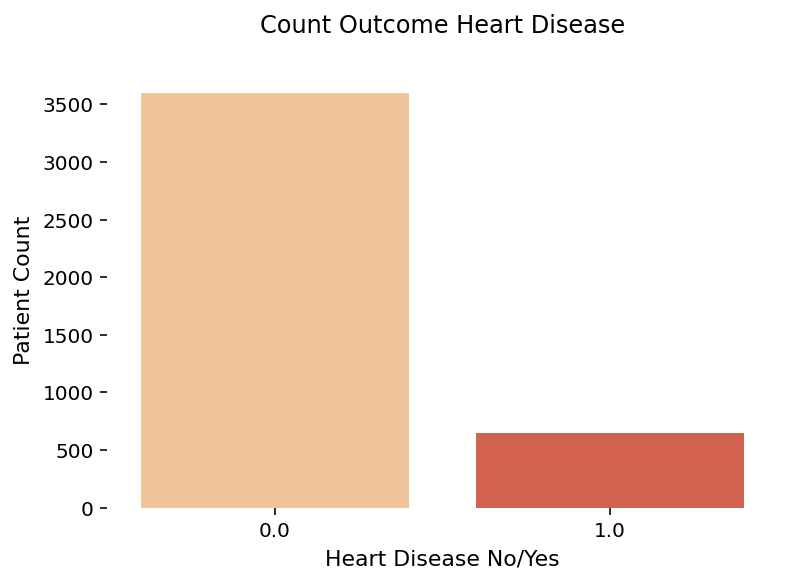

In [40]:
sns.countplot(x='TenYearCHD', data = df_scaled, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [43]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_scaled[df_scaled.TenYearCHD==0]
df_minority = df_scaled[df_scaled.TenYearCHD==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
normalized_df = pd.concat([df_majority, df_minority_upsampled])

# Check new class distribution
normalized_df.TenYearCHD.value_counts()


normalized_df.reset_index(drop=True, inplace=True)
normalized_df

0.0    3596
1.0    3596
Name: TenYearCHD, dtype: int64

sysBP   glucose       age   totChol  cigsPerDay     diaBP  \
0     0.222772  0.471154  0.184211  0.325893        0.00  0.291667   
1     0.371287  0.451923  0.368421  0.571429        0.00  0.475000   
2     0.435644  0.336538  0.421053  0.549107        0.40  0.458333   
3     0.460396  0.625000  0.368421  0.727679        0.46  0.525000   
4     0.955446  0.894231  0.289474  0.473214        0.00  0.958333   
...        ...       ...       ...       ...         ...       ...   
7187  0.480198  0.528846  0.394737  0.433036        0.00  0.641667   
7188  0.905941  0.432692  0.657895  0.379464        0.00  0.458333   
7189  0.608911  0.721154  0.394737  1.000000        0.36  0.358333   
7190  0.331683  0.471154  0.578947  0.620536        0.40  0.358333   
7191  0.707921  0.740385  0.868421  0.526786        0.00  0.525000   

      prevalentHyp  diabetes  BPMeds  male  TenYearCHD  
0              0.0       0.0     0.0   1.0         0.0  
1              0.0       0.0     0.0   0.0         0.0  
2              0.0       0.0     0.0   1.0         0.0  
3              0.0       0.0     0.0   0.0         0.0  
4              1.0       0.0     0.0   0.0         0.0  
...            ...       ...     ...   ...         ...  
7187           1.0       0.0     0.0   1.0         1.0  
7188           1.0       0.0     0.0   0.0         1.0  
7189           1.0       0.0     0.0   1.0         1.0  
7190           0.0       0.0     0.0   1.0         1.0  
7191           1.0       0.0     0.0   0.0         1.0  

[7192 rows x 11 columns]

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

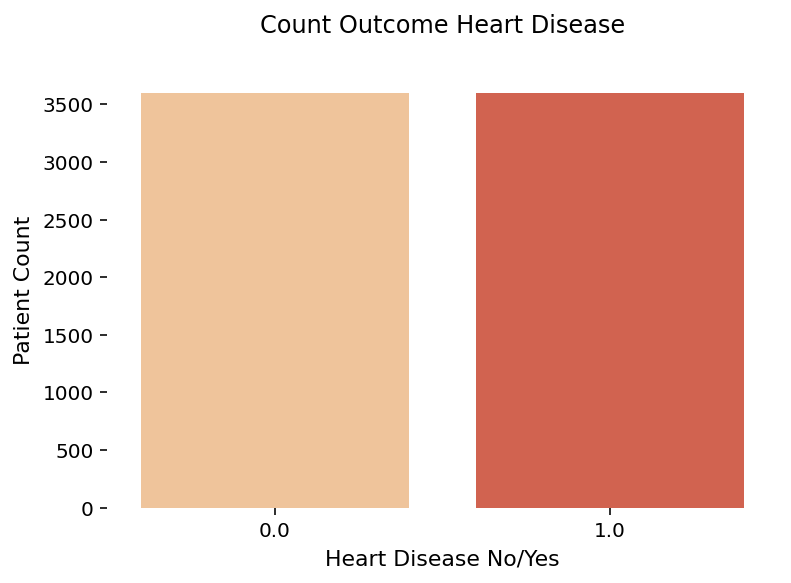

In [44]:
sns.countplot(x='TenYearCHD', data = normalized_df, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

**Models using single split & K-fold cross validation and Hyperparameter Tuning**

In [45]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 69.22%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 69.69%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 100.00%


Pipeline(steps=[('classifier', RandomForestClassifier())])

The accuracy score of RandomForestClassifier() is: 100.00%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 99.76%


In [46]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {np.round((acc*100),2)}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {np.round((f1*100),2)}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {np.round((precision*100),2)}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {np.round((recall*100),2)}%")

The accuracy score for LogReg is: 69.22%
The f1 score for LogReg is: 39.44%
The precision score for LogReg is: 27.6%
The recall score for LogReg is: 69.11%


In [47]:

# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=53)
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=53)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

#initialize model
lrm_up = LogisticRegression()

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for train_index, test_index in cv.split(X,y):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    lrm_up.fit(X_train, y_train)

    normalized_df_lrm_pred = lrm_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_lrm_pred)
    f1 = f1_score(y_test, normalized_df_lrm_pred)
    precision = precision_score(y_test, normalized_df_lrm_pred)
    recall = recall_score(y_test, normalized_df_lrm_pred)
    

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for LRM with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for LRM with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for LRM with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for LRM with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

Mean accuracy score for LRM with k-fold cross validation: 85.0
Mean f1 score for LRM with k-fold cross validation: 9.0
Mean precision score for LRM with k-fold cross validation: 71.0
Mean recall score for LRM with k-fold cross validation: 5.0


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'K-fold Cross-validation Results')

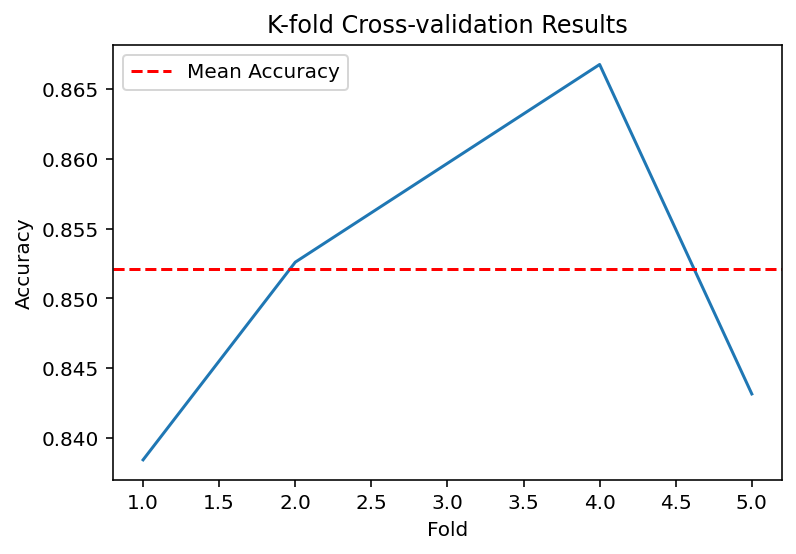

In [48]:
# plot k-fold vs accuracy
plt.plot(range(1, len(accuracy_scores)+1), accuracy_scores)
plt.axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-fold Cross-validation Results')
plt.legend()
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search over
param_grid = {'C': [0.1, 0.3, 0.5, 0.6, 1, 10, 100]}

# create a GridSearchCV object with the logistic regression model, the hyperparameter grid, and 5-fold cross validation
lrm_gs = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
lrm_gs.fit(X, y)

# print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {lrm_gs.best_params_}")
print(f"Best mean cross-validation score: {lrm_gs.best_score_}")

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.6, 1, 10, 100]})

Best hyperparameters: {'C': 0.3}
Best mean cross-validation score: 0.8525943396226415


In [51]:
from sklearn.model_selection import StratifiedKFold

# define k-fold cross-validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=53)
cv = KFold(n_splits=5, shuffle=True, random_state=53)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

#initialize model
lrm_up = LogisticRegression(C=lrm_gs.best_params_['C'])

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# loop over the folds and fit the model, predict on the test set, and evaluate performance
for train_index, test_index in cv.split(X,y):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    lrm_up.fit(X_train, y_train)

    normalized_df_lrm_pred = lrm_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_lrm_pred)
    f1 = f1_score(y_test, normalized_df_lrm_pred)
    precision = precision_score(y_test, normalized_df_lrm_pred)
    recall = recall_score(y_test, normalized_df_lrm_pred)
    
    # append performance metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for LRM with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for LRM with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for LRM with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for LRM with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


LogisticRegression(C=0.3)

LogisticRegression(C=0.3)

LogisticRegression(C=0.3)

LogisticRegression(C=0.3)

LogisticRegression(C=0.3)

Mean accuracy score for LRM with k-fold cross validation: 85.0
Mean f1 score for LRM with k-fold cross validation: 7.000000000000001
Mean precision score for LRM with k-fold cross validation: 79.0
Mean recall score for LRM with k-fold cross validation: 4.0


In [52]:
import joblib

# Save the KNN model
joblib.dump(lrm_up, 'LRM_model.joblib')

['LRM_model.joblib']

Text(0.5, 1.0, 'ROC CURVE KNN')

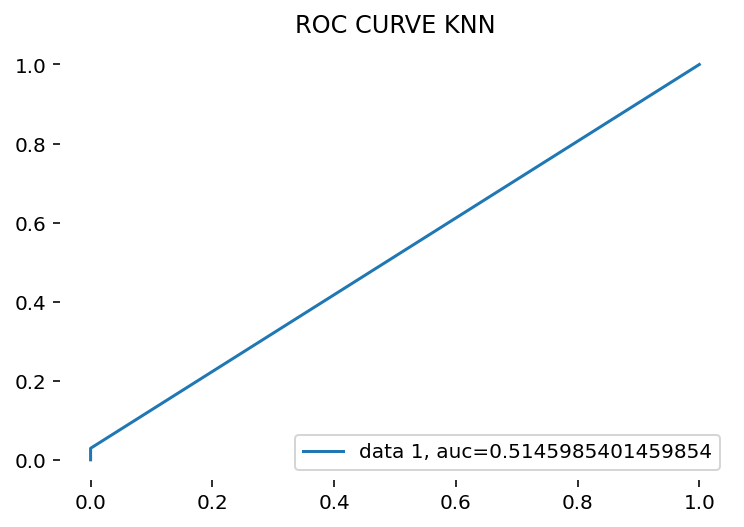

In [53]:
fpr, tpr, _ = roc_curve(y_test, normalized_df_lrm_pred)
auc = roc_auc_score(y_test, normalized_df_lrm_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

In [70]:
#print("X_test:\n", X_test)
#print("y_test:\n", y_test)


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

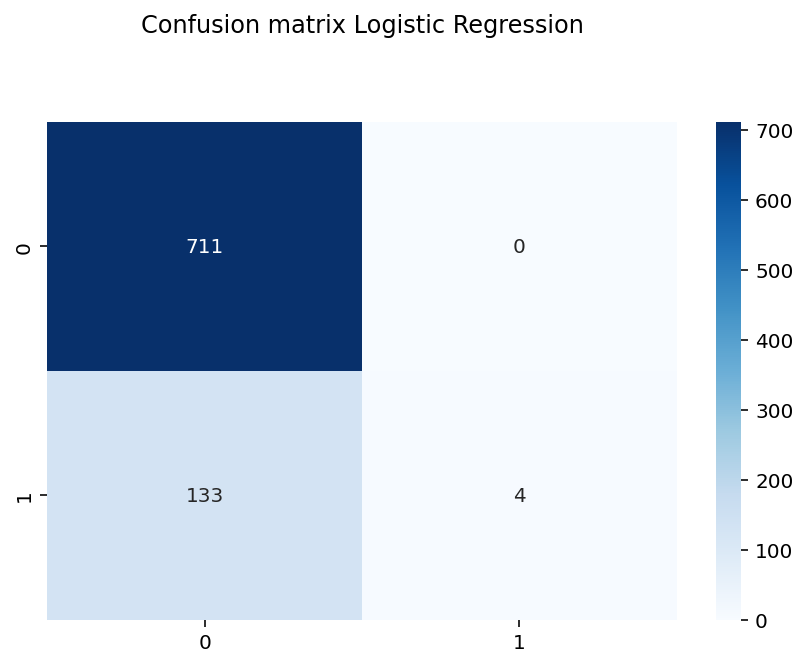

In [55]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_lrm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Blues" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [56]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc1 = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {np.round((acc1*100),2)}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {np.round((f1_1*100),2)}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision1 = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {np.round((precision1*100),2)}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall1 = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {np.round((recall1*100),2)}%")


SVC()

The accuracy score for SVM is: 83.84%
The f1 score for SVM is: 2.84%
The precision score for SVM is: 50.0%
The recall score for SVM is: 1.46%


In [57]:

# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

#initialize model
svm_up = SVC()

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# loop over the folds and fit the model, predict on the test set, and evaluate performance
for train_index, test_index in cv.split(X):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    svm_up.fit(X_train, y_train)

    normalized_df_svm_pred = svm_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_svm_pred)
    f1 = f1_score(y_test, normalized_df_svm_pred)
    precision = precision_score(y_test, normalized_df_svm_pred)
    recall = recall_score(y_test, normalized_df_svm_pred)
    
    # append performance metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for SVM with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for SVM with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for SVM with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for SVM with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


SVC()

SVC()

SVC()

SVC()

SVC()

Mean accuracy score for SVM with k-fold cross validation: 85.0
Mean f1 score for SVM with k-fold cross validation: 0.0
Mean precision score for SVM with k-fold cross validation: 20.0
Mean recall score for SVM with k-fold cross validation: 0.0


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'K-fold Cross-validation Results')

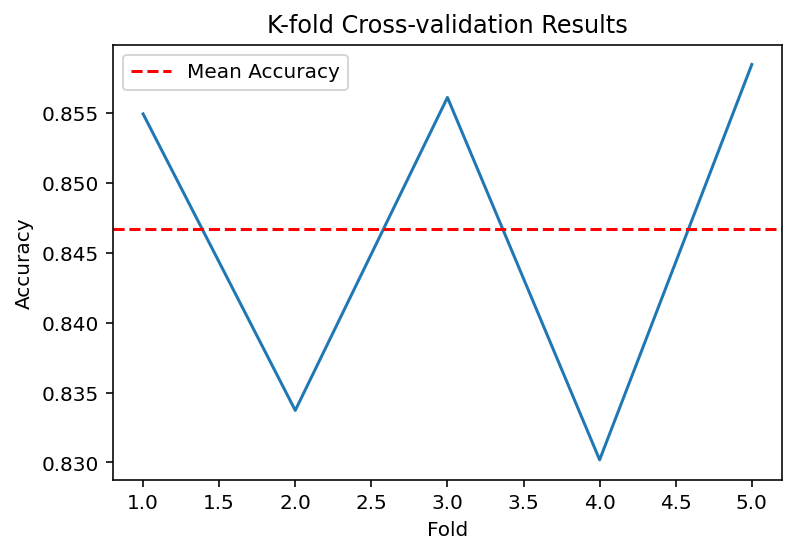

In [58]:
# plot k-fold vs accuracy
plt.plot(range(1, len(accuracy_scores)+1), accuracy_scores)
plt.axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-fold Cross-validation Results')
plt.legend()
plt.show()


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix SVM\n')

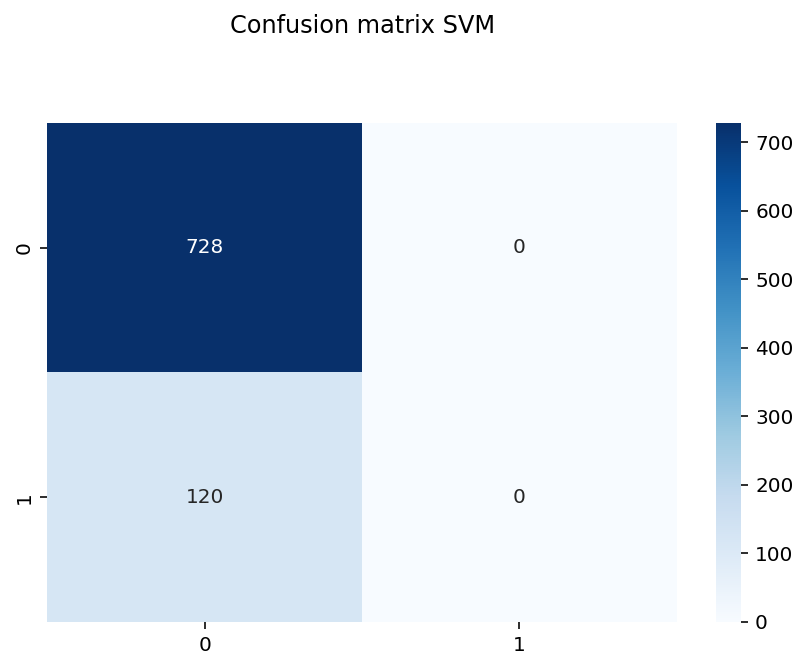

In [59]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Blues" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

In [60]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc3 = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {np.round((acc3*100),2)}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_3 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {np.round((f1_3*100),2)}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision3 = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {np.round((precision3*100),2)}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall3 = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {np.round((recall3*100),2)}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 75.35%
The f1 score for DTC is: 26.67%
The precision score for DTC is: 23.03%
The recall score for DTC is: 31.67%


In [61]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

#initialize model
dtc_up = DecisionTreeClassifier()

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# loop over the folds and fit the model, predict on the test set, and evaluate performance
for train_index, test_index in cv.split(X):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    dtc_up.fit(X_train, y_train)

    normalized_df_dtc_pred = dtc_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_dtc_pred)
    f1 = f1_score(y_test, normalized_df_dtc_pred)
    precision = precision_score(y_test, normalized_df_dtc_pred)
    recall = recall_score(y_test, normalized_df_dtc_pred)
    
    # append performance metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for DTC with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for DTC with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for DTC with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for DTC with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

DecisionTreeClassifier()

Mean accuracy score for DTC with k-fold cross validation: 75.0
Mean f1 score for DTC with k-fold cross validation: 24.0
Mean precision score for DTC with k-fold cross validation: 23.0
Mean recall score for DTC with k-fold cross validation: 26.0


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'K-fold Cross-validation Results')

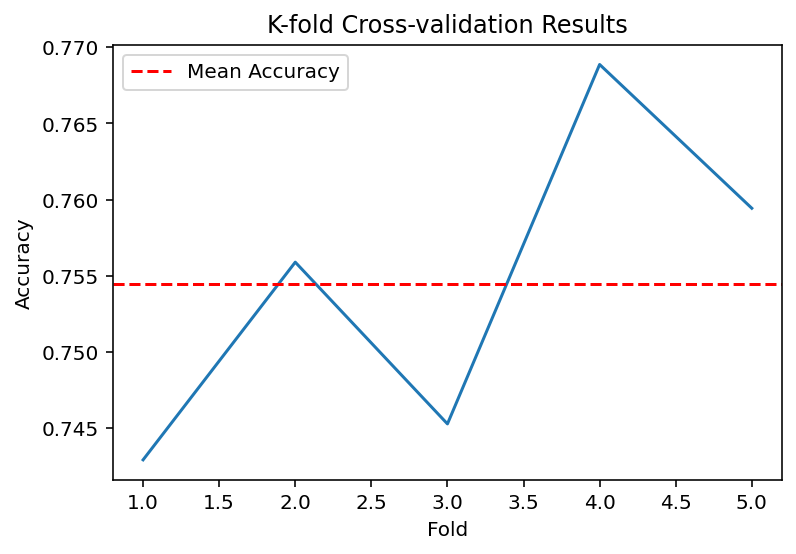

In [62]:
# plot k-fold vs accuracy
plt.plot(range(1, len(accuracy_scores)+1), accuracy_scores)
plt.axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-fold Cross-validation Results')
plt.legend()
plt.show()


In [63]:

# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

# initialize model with best hyperparameters
dtc_up = DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=1, min_samples_split=4)

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# loop over the folds and fit the model, predict on the test set, and evaluate performance
for train_index, test_index in cv.split(X):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    dtc_up.fit(X_train, y_train)

    normalized_df_dtc_pred = dtc_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_dtc_pred)
    f1 = f1_score(y_test, normalized_df_dtc_pred)
    precision = precision_score(y_test, normalized_df_dtc_pred)
    recall = recall_score(y_test, normalized_df_dtc_pred)
    
    # append performance metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for DTC with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for DTC with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for DTC with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for DTC with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_split=4)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_split=4)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_split=4)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_split=4)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_split=4)

Mean accuracy score for DTC with k-fold cross validation: 85.0
Mean f1 score for DTC with k-fold cross validation: 0.0
Mean precision score for DTC with k-fold cross validation: 0.0
Mean recall score for DTC with k-fold cross validation: 0.0


In [64]:
# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

# define the hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

# initialize model
dtc = DecisionTreeClassifier()

# create a GridSearchCV object with the decision tree model, the hyperparameter grid, and k-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=cv, n_jobs=-1)

# fit the GridSearchCV object to the data
grid_search.fit(X, y)

# print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {grid_search.best_score_}")

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]})

Best hyperparameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}
Best mean cross-validation score: 0.848820754716981


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

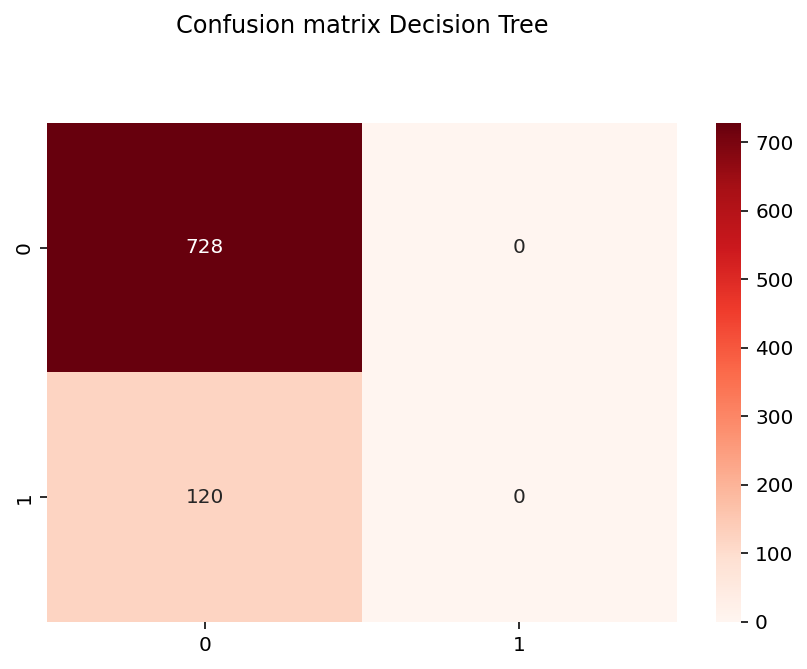

In [65]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


In [66]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc4 = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {np.round((acc4*100),2)}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1_4 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {np.round((f1_4*100),2)}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision4 = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {np.round((precision4*100),2)}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall4 = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {np.round((recall4*100),2)}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 83.61%
The f1 score for KNN is: 10.32%
The precision score for KNN is: 22.86%
The recall score for KNN is: 6.67%


In [67]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# define k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# convert dataframes to numpy arrays
X = x1.values
y = y1.values

#initialize model
knn_up = KNeighborsClassifier(n_neighbors = 2)

# create lists to store evaluation metrics for each fold
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# loop over the folds and fit the model, predict on the test set, and evaluate performance
for train_index, test_index in cv.split(X):
    # check that the indices are within range
    assert np.max(train_index) < X.shape[0], "Train index out of range"
    assert np.max(test_index) < X.shape[0], "Test index out of range"
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    # fit model
    knn_up.fit(X_train, y_train)

    normalized_df_knn_pred = knn_up.predict(X_test)

    # evaluate model performance
    accuracy = accuracy_score(y_test, normalized_df_knn_pred)
    f1 = f1_score(y_test, normalized_df_knn_pred)
    precision = precision_score(y_test, normalized_df_knn_pred)
    recall = recall_score(y_test, normalized_df_knn_pred)
    
    # append performance metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# calculate the mean and standard deviation of each evaluation metric across all folds
print(f"Mean accuracy score for KNN with k-fold cross validation: {np.round(np.mean(accuracy_scores),2)*100}")
print(f"Mean f1 score for KNN with k-fold cross validation: {np.round(np.mean(f1_scores),2)*100}")
print(f"Mean precision score for KNN with k-fold cross validation: {np.round(np.mean(precision_scores),2)*100}")
print(f"Mean recall score for KNN with k-fold cross validation: {np.round(np.mean(recall_scores),2)*100}")


KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

Mean accuracy score for KNN with k-fold cross validation: 83.0
Mean f1 score for KNN with k-fold cross validation: 9.0
Mean precision score for KNN with k-fold cross validation: 26.0
Mean recall score for KNN with k-fold cross validation: 5.0


Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'K-fold Cross-validation Results')

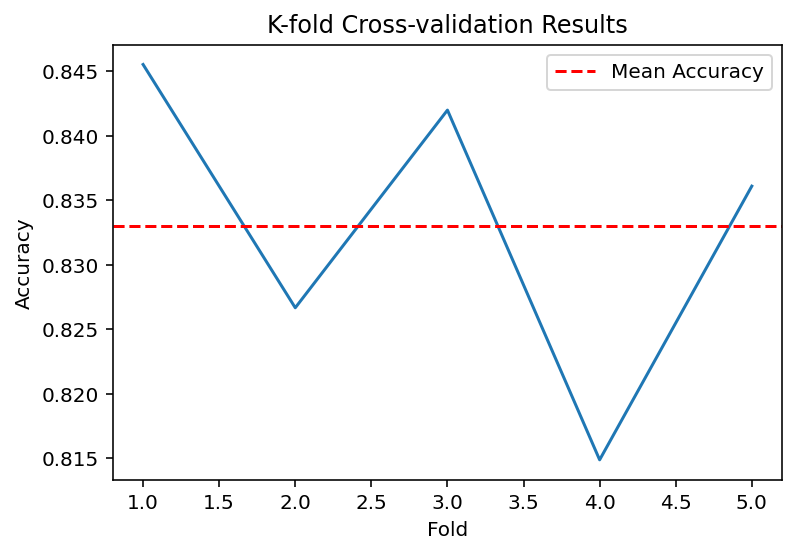

In [68]:
# plot k-fold vs accuracy
plt.plot(range(1, len(accuracy_scores)+1), accuracy_scores)
plt.axhline(y=np.mean(accuracy_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-fold Cross-validation Results')
plt.legend()
plt.show()


In [69]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(glucose)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler() 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = lrm_up.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 40
Patient's gender. male=1, female=0: >>> 0
Patient's smoked cigarettes per day: >>> 15
Patient's systolic blood pressure: >>> 121
Patient's diastolic blood pressure: >>> 77
Patient's cholesterin level: >>> 242
Was Patient hypertensive? Yes=1, No=0 >>> 0
Did Patient have diabetes? Yes=1, No=0 >>> 0
What is the Patient's glucose level? >>> 88
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 0


Result:
The patient will develop a Heart Disease.
